In [1]:
import os
import torch
import matplotlib.pyplot as plt
from mnistsvhn.experiment import MNISTSVHN

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['text.usetex'] = False

In [2]:
# EXP_DIR = 'runs/MNIST_SVHN/joint_elbo/non_factorized/laplace_laplace/SVHN_MNIST_2022_01_16_17_50_10_914822/'
# EXP_DIR = 'runs/MNIST_SVHN/poe/non_factorized/laplace_laplace/SVHN_MNIST_2022_01_16_17_53_47_966147/'
EXP_DIR = 'runs/MNIST_SVHN/moe/non_factorized/laplace_laplace/SVHN_MNIST_2022_01_16_17_58_57_782280/'

In [3]:
flags = torch.load(os.path.join(EXP_DIR, 'flags.rar'))

In [4]:
exp = MNISTSVHN(flags, [])

/home/ziyigong/.local/lib/python3.8/site-packages/torchvision/transforms/transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


/tmp/SVHN
/tmp/SVHN/train_32x32.mat
/tmp/SVHN
/tmp/SVHN/test_32x32.mat
dict_keys(['real', 'random', '', 'mnist', 'svhn', 'mnist_svhn'])


In [5]:
vae = exp.mm_vae

In [6]:
vae.load_state_dict(torch.load(os.path.join(EXP_DIR, 'checkpoints/0029/mm_vae')))

<All keys matched successfully>

In [7]:
dataset = exp.dataset_test
test_loader = torch.utils.data.DataLoader(dataset, batch_size=50, shuffle=True)

In [8]:
counter = 0
with torch.no_grad():
    for (data, label) in test_loader:
        for key in data.keys():
            data[key] = data[key].to(flags.device)
        results = vae(data)
        if counter > -1:
            break
        counter += 1

In [9]:
rec_mnist = results['rec']['mnist'].loc
rec_svhn = results['rec']['svhn'].loc

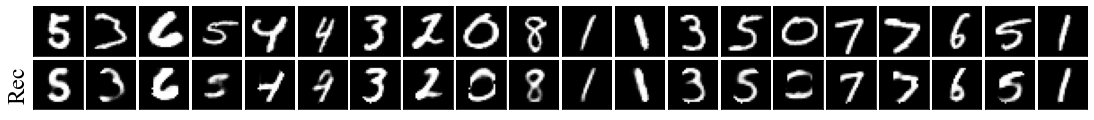

In [10]:
ncols = min(rec_mnist.shape[0], 20)
fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(15, 1.5))
for i, aux in enumerate(zip(data['mnist'], rec_mnist)):
    if i >= ncols:
        break
    for j, im in enumerate(aux):
        ax[j, i].imshow(im.cpu().numpy().reshape(28, 28), cmap='gray')
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])
ax[1, 0].set_ylabel('Rec', fontsize=24)
fig.tight_layout(pad=0)

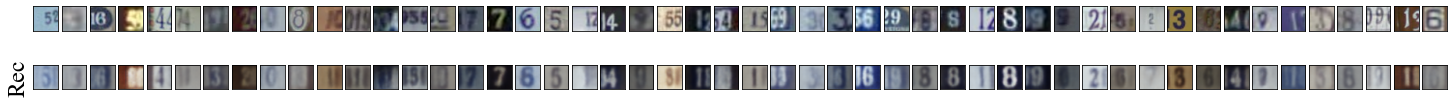

In [11]:
ncols = min(rec_svhn.shape[0], 50)
fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(20, 2))
for i, aux in enumerate(zip(data['svhn'], rec_svhn)):
    if i >= ncols:
        break
    for j, im in enumerate(aux):
        ax[j, i].imshow(im.cpu().numpy().transpose(1, 2, 0))
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])
ax[1, 0].set_ylabel('Rec', fontsize=24)
fig.tight_layout(pad=0)

## Testing

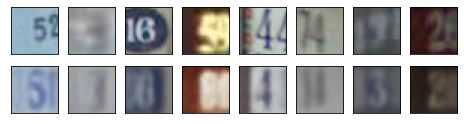

In [12]:
i_s, i_t = 0, 8
data_ = {'mnist': data['mnist'][i_s:i_t], 'svhn': data['svhn'][i_s:i_t]}
with torch.no_grad():
    results_ = vae(data_)
fig, ax = plt.subplots(nrows=2, ncols=i_t-i_s, figsize=(1*(i_t-i_s), 2))
if len(ax.shape) == 1:
    ax = ax[:, None]
for k in range(i_t - i_s):
    ax[0, k].imshow(data_['svhn'][k].cpu().numpy().transpose(1, 2, 0))
    ax[1, k].imshow(results_['rec']['svhn'].loc[k].cpu().numpy().transpose(1, 2, 0))
    ax[0, k].set_xticks([])
    ax[1, k].set_xticks([])
    ax[0, k].set_yticks([])
    ax[1, k].set_yticks([])

In [13]:
latents_0_8 = results_['latents']

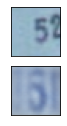

In [14]:
i_s, i_t = 0, 1
data_ = {'mnist': data['mnist'][i_s:i_t], 'svhn': data['svhn'][i_s:i_t]}
with torch.no_grad():
    results_ = vae(data_)
fig, ax = plt.subplots(nrows=2, ncols=i_t-i_s, figsize=(1*(i_t-i_s), 2))
if len(ax.shape) == 1:
    ax = ax[:, None]
for k in range(i_t - i_s):
    ax[0, k].imshow(data_['svhn'][k].cpu().numpy().transpose(1, 2, 0))
    ax[1, k].imshow(results_['rec']['svhn'].loc[k].cpu().numpy().transpose(1, 2, 0))
    ax[0, k].set_xticks([])
    ax[1, k].set_xticks([])
    ax[0, k].set_yticks([])
    ax[1, k].set_yticks([])

In [15]:
latents_0_1 = results_['latents']

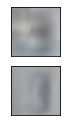

In [16]:
i_s, i_t = 1, 2
data_ = {'mnist': data['mnist'][i_s:i_t], 'svhn': data['svhn'][i_s:i_t]}
with torch.no_grad():
    results_ = vae(data_)
fig, ax = plt.subplots(nrows=2, ncols=i_t-i_s, figsize=(1*(i_t-i_s), 2))
if len(ax.shape) == 1:
    ax = ax[:, None]
for k in range(i_t - i_s):
    ax[0, k].imshow(data_['svhn'][k].cpu().numpy().transpose(1, 2, 0))
    ax[1, k].imshow(results_['rec']['svhn'].loc[k].cpu().numpy().transpose(1, 2, 0))
    ax[0, k].set_xticks([])
    ax[1, k].set_xticks([])
    ax[0, k].set_yticks([])
    ax[1, k].set_yticks([])

In [17]:
latents_1_2 = results_['latents']

In [18]:
(latents_0_8['modalities']['svhn'][0][0] != latents_0_1['modalities']['svhn'][0][0]).sum(), \
(latents_0_8['modalities']['svhn'][1][0] != latents_0_1['modalities']['svhn'][1][0]).sum()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

In [19]:
(latents_0_8['modalities']['svhn'][0][1] != latents_1_2['modalities']['svhn'][0][0]).sum(), \
(latents_0_8['modalities']['svhn'][1][1] != latents_1_2['modalities']['svhn'][1][0]).sum()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

In [20]:
(latents_0_8['subsets']['svhn'][0][0] != latents_0_1['subsets']['svhn'][0][0]).sum(), \
(latents_0_8['subsets']['svhn'][1][0] != latents_0_1['subsets']['svhn'][1][0]).sum()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

In [21]:
(latents_0_8['subsets']['svhn'][0][1] != latents_1_2['subsets']['svhn'][0][0]).sum(), \
(latents_0_8['subsets']['svhn'][1][1] != latents_1_2['subsets']['svhn'][1][0]).sum()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

In [22]:
(torch.abs(latents_0_8['subsets']['mnist_svhn'][0][0] - latents_0_1['subsets']['mnist_svhn'][0][0]) > 1e-6).sum(), \
(torch.abs(latents_0_8['subsets']['mnist_svhn'][1][0] - latents_0_1['subsets']['mnist_svhn'][1][0]) > 1e-6).sum()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

In [23]:
(torch.abs(latents_0_8['subsets']['mnist_svhn'][0][1] - latents_1_2['subsets']['mnist_svhn'][0][0]) > 1e-6).sum(), \
(torch.abs(latents_0_8['subsets']['mnist_svhn'][1][1] - latents_1_2['subsets']['mnist_svhn'][1][0]) > 1e-6).sum()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

In [24]:
(torch.abs(latents_0_8['mus'][:, 0, :] - latents_0_1['mus'][:, 0, :]) > 1e-6).sum(), \
(torch.abs(latents_0_8['logvars'][:, 0, :] - latents_0_1['logvars'][:, 0, :]) > 1e-6).sum()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

In [25]:
(torch.abs(latents_0_8['mus'][:, 1, :] - latents_1_2['mus'][:, 0, :]) > 1e-6).sum(), \
(torch.abs(latents_0_8['logvars'][:, 1, :] - latents_1_2['logvars'][:, 0, :]) > 1e-6).sum()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

In [26]:
torch.abs(latents_0_8['joint'][0][0] - latents_0_1['joint'][0][0]).sum(), \
torch.abs(latents_0_8['joint'][1][0] - latents_0_1['joint'][1][0]).sum()

(tensor(9.0897e-07, device='cuda:0'), tensor(4.7684e-06, device='cuda:0'))

In [27]:
torch.abs(latents_0_8['joint'][0][1] - latents_1_2['joint'][0][0]).sum(), \
torch.abs(latents_0_8['joint'][1][1] - latents_1_2['joint'][1][0]).sum()

(tensor(7.5996e-07, device='cuda:0'), tensor(1.9073e-06, device='cuda:0'))

In [28]:
latents_0_8['weights'], latents_0_1['weights'], latents_1_2['weights']

(tensor([0.5000, 0.5000], device='cuda:0'),
 tensor([0.5000, 0.5000], device='cuda:0'),
 tensor([0.5000, 0.5000], device='cuda:0'))

In [29]:
latents_0_8.keys()

dict_keys(['modalities', 'mus', 'logvars', 'weights', 'joint', 'subsets'])